In [5]:
from utils import *
from fastai2.vision.widgets import *
import torch 

####  fastai dataloader using compressed images of size 256x256 

In [6]:
def label_func3(file_path):
    """ input : file_path (path:object)
                ( e.g. /home/abharani/data/train_images/6fc63d2394ebade5d7e09856eab1f726_0.jpg)
        returns : 1 , 2, 3 (int)
    """ 
    image_name = str(file_path).split("/")[-1]

    return int(image_name.replace(".jpg", "").split("_")[-1])


In [13]:
biopsy_images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [14]:
path = Path('/home/abharani/cs231n_project/glued_images/data')
dls = biopsy_images.dataloaders(path)

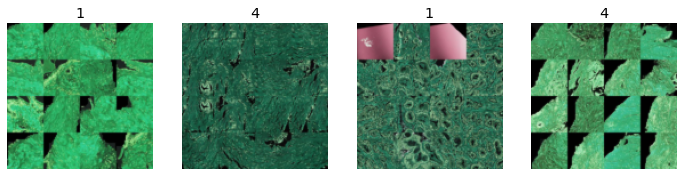

In [15]:
dls.valid.show_batch(max_n=4, nrows=1)


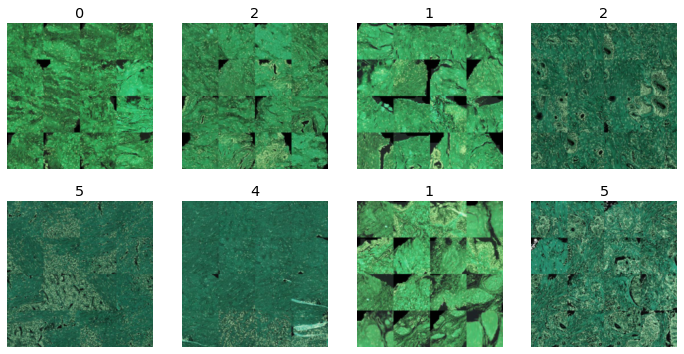

In [19]:
biopsy_images = biopsy_images.new(item_tfms=Resize(224, ResizeMethod.Squish,aug_transforms(mult=2)))
dls = biopsy_images.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,time
0,2.195380,1.786352,0.358455,02:51


epoch,train_loss,valid_loss,accuracy,time
0,1.576035,1.506379,0.429581,03:51
1,1.185862,1.631011,0.414037,03:51
2,0.830986,2.082050,0.418276,03:51
3,0.502659,2.427341,0.401790,03:51
4,0.478190,2.603261,0.397551,03:51
5,0.383331,2.945987,0.397551,03:51
6,0.271272,2.683587,0.417805,03:51
7,0.197789,3.134688,0.375412,03:51
8,0.193308,3.171073,0.414508,03:51
9,0.143933,3.051677,0.418747,03:51


Traceback (most recent call last):
  File "/opt/anaconda3/envs/cs231n/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/envs/cs231n/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/envs/cs231n/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/envs/cs231n/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)


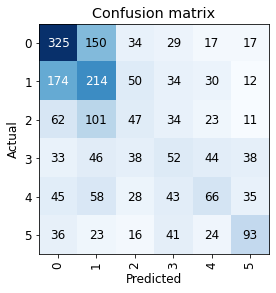

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()